# Отбор признаков на примере датасета ирисы. Мультиколлинеарность

**Отбор признаков** — процесс выбора важных признаков, наиболее влияющих на предсказание.

Например, если бы мы делали отбор признаков для задачи сомелье винных обзоров, мы бы отобрали те признаки, что больше всего влияют на рейтинг вина.

### ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ?

1. **Сократить время обучения**. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. **Повысить качество предсказания**. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют **мультиколлинеарностью**.

### KАК ПОНЯТЬ, КАКИЕ ПРИЗНАКИ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ПРЕДСКАЗАНИЕ?

Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как **значимость**, **критерий значимости**, гипотеза**. 

Mы рассмотрим такое понятие, как **мультиколлинеарность**и её связь с отбором признаков.

**Мультиколлинеарность** — сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

Некоторые модели плохо работают на данных с мультиколлинеарностью. Вы узнаете об этом позже в модулях про машинное обучение.

Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

Рассмотрим отбор признаков в *Python*. Для этого воспользуемся обучающим [датасетом о цветках ириса](https://lms.skillfactory.ru/assets/courseware/v1/ce42b95793b6abb664068d5865e0df1a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/iris.zip).

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (*Iris setosa*), Ирис виргинский (*Iris virginica*) и Ирис разноцветный (*Iris versicolor*). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* **sepal length** — длина наружной доли околоцветника;
* **sepal width** — ширина наружной доли околоцветника;
* **petal length** — длина внутренней доли околоцветника;
* **petal width** — ширина внутренней доли околоцветника.

На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

In [3]:
# Импортируем необходимую библиотеку:
import pandas as pd
# Прочитаем датасет и посмотрим на первые несколько строк.
iris = pd.read_csv('data\iris.zip')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на *variety* — *sepal.length*, *sepal.width*, *petal.length*, *petal.width*.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

C:\Users\Lida\AppData\Local\Temp\ipykernel_7076\4058247376.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True)


<Axes: >

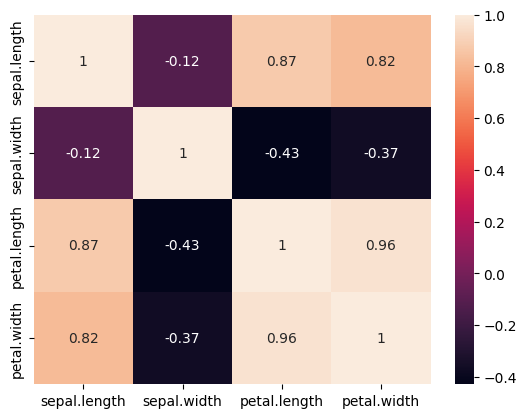

In [4]:
# импортируем seaborn для построения графиков
import seaborn as sns
# включаем отображение коэффициентов
sns.heatmap(iris.corr(), annot=True)

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: *sepal.length* и *petal.width*, *petal.length* и *sepal.length*, *petal.width* и *petal.length*.

Начнём с самого высокого коэффициента корреляции в паре признаков: *petal.width* и *petal.length* 0,96. Удалим любой признак из этой пары, например *petal.width*, так как он коррелирует ещё и с признаком *sepal.length*:

In [5]:
iris = iris.drop(['petal.width'], axis=1)

Однако второй признак petal.length из этой пары также сильно коррелирует с признаком *sepal.length*. Удалим и его:

In [6]:
iris = iris.drop(['petal.length'], axis=1)

In [8]:
# Посмотрим на результат:
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: *sepal.width* и *sepal.length*, и признак, который необходимо предсказать — *variety*. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака — *sepal length* (длина наружной доли околоцветника) и *sepal width* (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки *petal length* (длина внутренней доли околоцветника) и *petal width* (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

Таким образом, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

### КАКОЙ ПРИЗНАК УДАЛЯТЬ?

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

**Пример**

Если мы округлим длину чашелистика и запишем её в новый признак *sepal.length.round*,

In [10]:
iris['sepal.length_round'] = iris['sepal.length'].round().astype(int)
iris.head()

,sepal.length,sepal.width,variety,sepal.length_round
0,5.1,3.5,Setosa,5
1,4.9,3.0,Setosa,5
2,4.7,3.2,Setosa,5
3,4.6,3.1,Setosa,5
4,5.0,3.6,Setosa,5


то корреляция исходного признака *sepal.length* и нового признака *sepal.length.round* будет очень сильной. Это изображено на тепловой карте ниже.

C:\Users\Lida\AppData\Local\Temp\ipykernel_7076\4058247376.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True)


<Axes: >

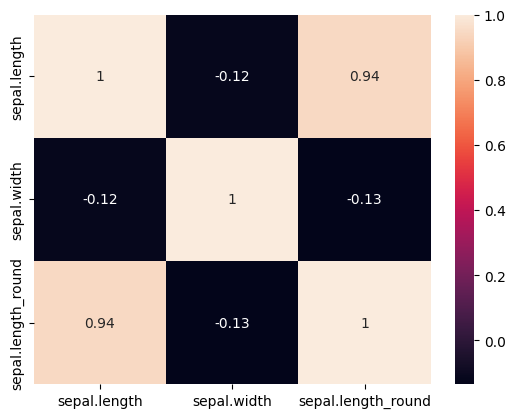

In [11]:
# импортируем seaborn для построения графиков
import seaborn as sns
# включаем отображение коэффициентов
sns.heatmap(iris.corr(), annot=True)

Корреляция между исходным признаком *sepal.lengt* и новым признаком *sepal.length.round* составила 0.94. При отборе признаков один из них необходимо удалить. В этом случае лучше выбрать *sepal.length.round*, так как с целым числом удобнее работать.

Подобные критерии для удаления вы можете выбирать самостоятельно для удобства работы с признаками.